In [334]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import KFold, cross_val_score, ShuffleSplit, train_test_split
from scipy.stats import linregress
mpl.rcParams['figure.dpi'] = 100

In [335]:
def plot_actual_vs_pred(X_train,X_test,y_train,y_test,gprfit):
    y_train_pred,y_train_std = gprfit.predict(X_train,return_std=True)
    y_test_pred,y_test_std = gprfit.predict(X_test,return_std=True)
    plt.scatter(y_train,y_train_pred,s=10,alpha=.5)
    plt.scatter(y_test,y_test_pred,s=10,alpha=.5)
    print(y_test.shape,y_test_pred.shape)
    coeff = linregress(np.array(y_test),np.reshape(y_test_pred,y_test.shape))
    plt.plot(np.linspace(0,np.max(y_train_pred),100), np.linspace(0,np.max(y_train_pred),100)*coeff[0]+coeff[1],color="orange")
    plt.legend(["r^2: "+str(np.round(coeff[2]**2,3)),"Train","Test"])
    plt.xlabel("Y")
    plt.ylabel("Predicted Y")

In [336]:
data = (pd.read_csv("INITIAL.csv")).drop(["Y"],axis=1)
virtualX = pd.read_csv("VIRTUAL.csv").drop(["Y"],axis=1)
virtualY = (pd.read_csv("VIRTUAL.csv")["Y"])
Y = (pd.read_csv("INITIAL.csv")["Y"])


scaler = StandardScaler()
trained_scaler = scaler.fit(data)
X = (trained_scaler.transform(data))
virtualX = (trained_scaler.transform(virtualX))

cv = ShuffleSplit(n_splits=5,random_state=123)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)


In [337]:
kernel=RBF(1)
gpr = GaussianProcessRegressor()
scaler = StandardScaler()
fit_scaler = scaler.fit(data)
scaled_data = fit_scaler.transform(data)

In [338]:
lrange = np.linspace(1,2.2,10)
krange = [1,2,10,100,1000]
crossval = np.zeros((len(lrange),len(krange)))
for i in range(len(lrange)):
    for j in range(len(krange)):
        kernel= krange[j]*RBF(lrange[i])
        gpr = GaussianProcessRegressor(kernel=kernel)
        crossval[i,j] = np.average(cross_val_score(gpr,scaled_data,Y,cv=cv,scoring="r2"))

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warning

Text(45.722222222222214, 0.5, 'L value')

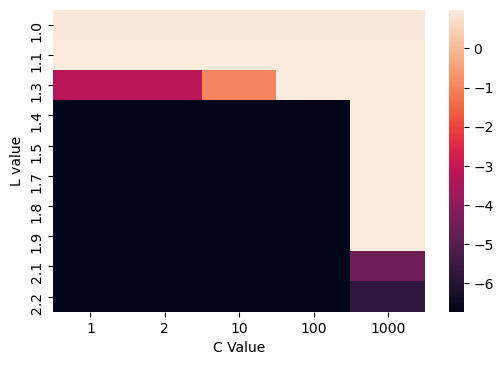

In [339]:
sns.heatmap(crossval,yticklabels=np.round(lrange,1),xticklabels=np.round(krange,1))
plt.xlabel("C Value")
plt.ylabel("L value")


(25,) (25,)


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:509: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


Text(0.5, 1.0, 'No Data Augmentation')

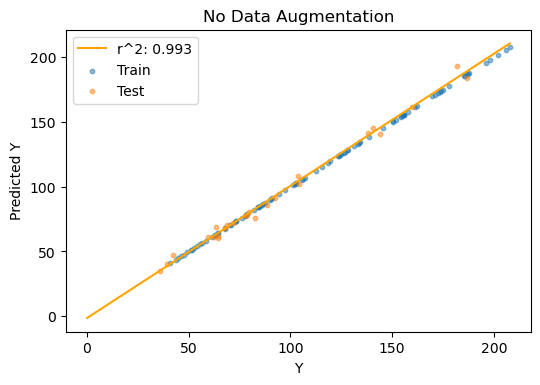

In [340]:
#Compare the predicted tensile strength values to the observed tensile strength values for the test and train datasets
gpr = GaussianProcessRegressor(kernel = 100*RBF(1.1))
gprfit = gpr.fit(X_train,y_train)

plot_actual_vs_pred(X_train,X_test,y_train,y_test,gprfit)
plt.title("No Data Augmentation")

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375:

(199, 5)
(25,) (25, 1)


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


Text(0.5, 1.0, '100 Points added with Maximum Uncertainty')

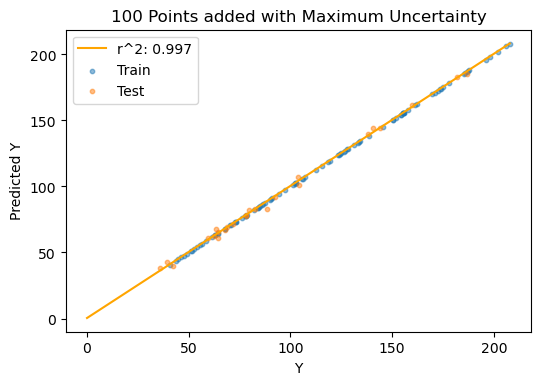

In [341]:
appendingX = pd.DataFrame(X_train,copy=True)
appendingY = pd.DataFrame(y_train,copy=True)

add_vals = 100

max_u_mse = np.zeros(add_vals)
r2 = np.zeros(add_vals)
uncertainty_list = np.zeros(add_vals)

gpr = GaussianProcessRegressor(kernel = 1000*RBF(1.6))
gprfit = gpr.fit(appendingX,appendingY)

for i in range(add_vals):
 
    #identify the most unceratin values
    predictions, uncertainties = gprfit.predict(virtualX,return_std=True)
    index = np.argmax(np.absolute(uncertainties))
    #index = np.random.randint(0, len(virtualX))

    appendingX.loc[len(X)+i] = virtualX[index,:]
    appendingY.loc[len(X)+i] = virtualY[index]

    
    gprfit = gpr.fit(appendingX,appendingY)

    max_u_mse[i] = mean_squared_error(y_test,gprfit.predict(X_test))
    r2[i] = r2_score(y_test,gprfit.predict(X_test))

print(appendingX.shape)

plot_actual_vs_pred(X_train,X_test,y_train,y_test,gprfit)
plt.title("100 Points added with Maximum Uncertainty")

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375:

(199, 5)
(25,) (25, 1)


Text(0.5, 1.0, '100 points added with random baseline')

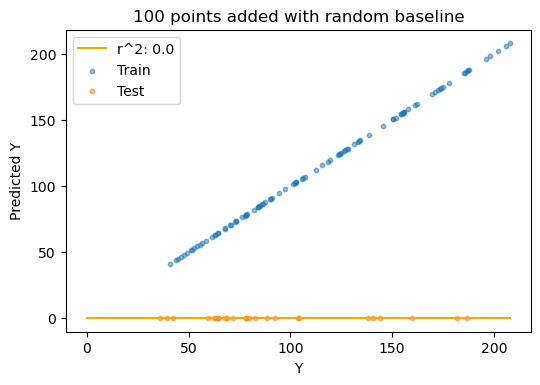

In [342]:
appendingX = pd.DataFrame(X_train,copy=True)
appendingY = pd.DataFrame(y_train,copy=True)

add_vals = 100

rand_mse = np.zeros(add_vals)
r2 = np.zeros(add_vals)
uncertainty_list = np.zeros(add_vals)
rng = np.random.default_rng(seed=42)
randints = rng.integers(low=0,high=len(virtualX),size=add_vals)

gpr = GaussianProcessRegressor(kernel = 1000*RBF(1.6))
gprfit = gpr.fit(appendingX,appendingY)

for i in range(add_vals):
 
    #identify the most unceratin values
    predictions, uncertainties = gprfit.predict(virtualX,return_std=True)
    #index = np.argmax(uncertainties)
    index = randints[i]

    appendingX.loc[len(X)+i] = virtualX[index,:]
    appendingY.loc[len(X)+i] = virtualY[index]

    
    gprfit = gpr.fit(appendingX,appendingY)

    rand_mse[i] = mean_squared_error(y_test,gprfit.predict(X_test))
    r2[i] = r2_score(y_test,gprfit.predict(X_test))

print(appendingX.shape)

plot_actual_vs_pred(X_train,X_test,y_train,y_test,gprfit)
plt.title("100 points added with random baseline")


Text(0.5, 1.0, 'Accuracy gain with added datapoints')

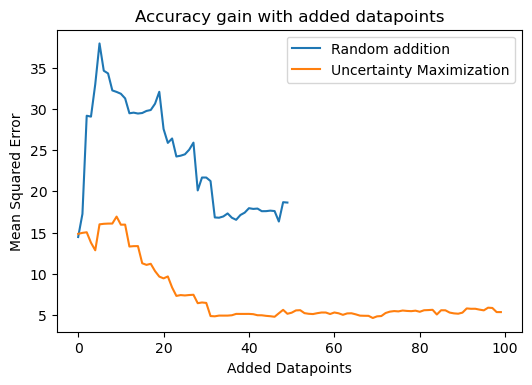

In [349]:
plt.plot(rand_mse[:50])
plt.plot(max_u_mse[:100])
plt.xlabel("Added Datapoints")
plt.ylabel("Mean Squared Error")
plt.legend(["Random addition","Uncertainty Maximization"])
plt.title("Accuracy gain with added datapoints")